<a href="https://colab.research.google.com/github/SaurabhSRP/Missing_Values/blob/main/Missing_Values(numerical_data%2Ccontinuous_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Missing values - Feature Engineering

In [ ]:
#why is data missing?
## 
## Lifecycle of Data Science Projects
##1) Data collection Strategy -- from company side,3rd party API,surveys
##2)Feature Engineering - handling the missing values 


In [ ]:
##Data types that will be missing 
##1) Continous data -- 
##2) discrete data
##3) Categorical data 

###What are the different types of missing data
#### 1)Missing at random (MCAR) - if the probability of being missin is the same for all the obeservations.when data is MCAR there is absolutely no relationship between the data missin and any other values,observed or missing within the dataset. In other words , those missing data points are random subset of data.There is nothing systematic going on that make some data more likely to be missing than other. If the values for obeservation are missing completely at random, then disregarding those cases would not bias the inference made.
#### 2) 

In [ ]:
##import all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/Titanic/train (1).csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
##as per MARC definition , do Age and cabin have any relation ? 
## yes , there is a relationship, as data was collected after the accident 
## Because many died so there is no record of age and cabin so its not MCAR
## but embark is MCAR 

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


###2)Missing data not at random(MNAR): also called as Systematic Missing Values - There is absolutely some relationship between the data missing and any other values, within the dataset

In [ ]:
## in above data 'Cabin' and 'Age' as MNAR

In [ ]:
#lets do some EDA on cabin and age , where ever there is NaN it will be replaced with 1 and other 0 just for EDA
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
##find the percentage of NaN values
df['Cabin_null'].mean()

0.7710437710437711

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [ ]:
##check if survived passenger has mentioned his cabin
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

###Missing at Random (MAR) - 

### All the techniques of handling the missing values
####1) mean/median/mode replacement
####2) Random sample imputation
####3) Capturing NaN with a new feature
####4) End of distribution imputation
#####all above used for continous numerical data
####5) Arbitrary imputation
####6) Frequent categories imputation
#####above 2 are used for categorical data
 

In [ ]:
### Mean /Median / Mode imputation


###When to apply MEAN/MEDIAN/Mode implementation 
##MEan imputation has the assumption that the data are missing completely at random (MCAR), we solve this by replacing the NaN with the most Frequent occurance of the variable 

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/datasets/Titanic/train (1).csv",usecols=['Age','Fare','Survived'])

In [ ]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
##percentage of missing values
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
## create a function 
def impute_nan(df1,variable,median):
  df1[variable+"_median"]=df1[variable].fillna(median)

In [ ]:
median=df['Age'].median()
median

28.0

In [ ]:
impute_nan(df1,"Age",median)

In [ ]:
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
##Has SD of Age and SD of Age_median has changed or same
print(df['Age'].std())
print(df['Age_median'].std())
## its just a minor difference 

14.526497332334044
13.019696550973194


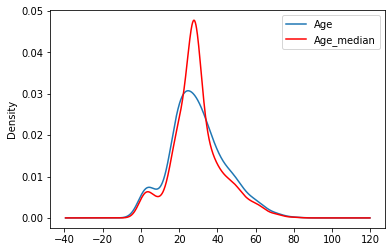

In [ ]:
## check the distribution using graph
fig=plt.figure()
ax=fig.add_subplot(111)
df1['Age'].plot(kind='kde',ax=ax)
df1['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
###Observation - curve increased because the NaN got replaced with median multiple times


#Median for numerical, Mode for Categorical
##Advantages of Mean/Median Imputation
###1) Easy to implement 
###2) Robust to outliers
###3) Faster way to obtain the complete dataset

##Disadvantages of Mean/Median Imputation
###1) Change or distortion in the original distribution or variance 
###2) impacts correlation

####But we can tackle the disadvantage

#DAY 2

#Random Sample Imputation
##AIM - Random sample imputation it consists of taking random observation from the dataset and we use this observation to replace the NaN values

##When to use?
###It assumes that the data are missing completely at Random (MCAR)


In [ ]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/datasets/Titanic/train (1).csv",usecols=['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
##percentage of null values 
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
##Pick random value but it also has NaN values 
df2['Age'].sample()

215    31.0
Name: Age, dtype: float64

In [ ]:
##lets drop those NaN and sample it 
df2['Age'].dropna().sample()

406    51.0
Name: Age, dtype: float64

In [ ]:
##now consider this condition 
df2['Age'].dropna().sample(df2['Age'].isnull().sum(),random_state=0)
##here the code inside the 'Sample', the null values are getting replaced by sample
##random-state if not defined , everytime we will get different values
##length at the bottom is 177 i.e is equal the NaN values 
##sample(*impute number*)
##we need 177 sample so that number we get with .isnull().sum()

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df2[df2['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
median=df2.Age.median()
median

28.0

In [ ]:
##Create the function for replacing all NaN values
def impute_rnan(df2,variable,median):
  df2[variable+"_median"]=df2[variable].fillna(median)
  df2[variable+"_random"]=df2[variable]
  #Random_sample will have random sample to fill NaN
  random_sample=df2[variable].dropna().sample(df2[variable].isnull().sum(),random_state=0)
  #pandas need to have same index to merge the dataset
  random_sample.index=df2[df2[variable].isnull()].index
  df2.loc[df2[variable].isnull(),variable+"_random"]=random_sample

In [ ]:
 ##execute
 impute_rnan(df2,"Age",median)

In [ ]:
df2.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


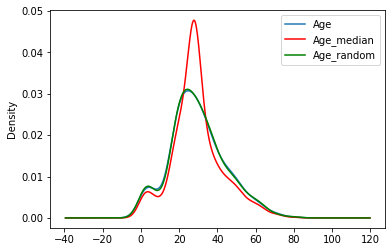

In [ ]:
##lets see the distribution 
fig=plt.figure()
ax=fig.add_subplot(111)
df2['Age'].plot(kind='kde',ax=ax)
df2['Age_median'].plot(kind='kde',ax=ax,color='red')
df2['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
##we can see the age and age_random is almost highly accurate and same unlike median method


##Advantage:
###1) Easy to implement
###2) there is no to less distortion in vairance

##Disadvantage 
###1)Every situation randomness wont work 

#**3rd Technique - "Capturing NaN values with a new feature"**

####it works well when if data are not missing completelly at random (MNCR)

In [ ]:
##import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df3=pd.read_csv("/content/drive/MyDrive/datasets/Titanic/train (1).csv",usecols=['Age','Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
##where ever the age is NaN replace it with 1 else it is zero
df3['Age_NaN']=np.where(df3['Age'].isnull(),1,0)
##new feature Age_NaN is created

In [ ]:
df3.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
##you can put a median or random sample in it 
df3['Age'].fillna(df3.Age.median(),inplace=True)
df3.head(25)
##use this feautre we can tell our ml model that something has happened whereever there was 1 as Age_NaN

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#Advantages
####1) Easy to implement
####2) captures the importance of missing values

#Disadvantages
###1)creates additional features
####for ex 10 categories of missing values , then 10 additional features will be created that is called curse of dimensionality   

#**4th Technique - End of Distribution imputation**

In [ ]:
##import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df4=pd.read_csv("/content/drive/MyDrive/datasets/Titanic/train (1).csv",usecols=['Age','Fare','Survived'])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


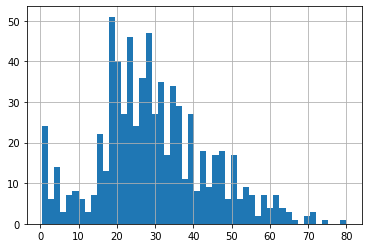

In [ ]:
## We will be taking the far end of distribution 
df4['Age'].hist(bins=50)
##in the graph from the far end of x axis 70,80

In [ ]:
df4.Age.mean()
#center value of normal distribution 
#to get the end means we will be taking after the 3rd SD 

29.69911764705882

In [ ]:
##to get that sd by following code 
df4['Age'].mean()+3*df4['Age'].std()

73.27860964406095

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


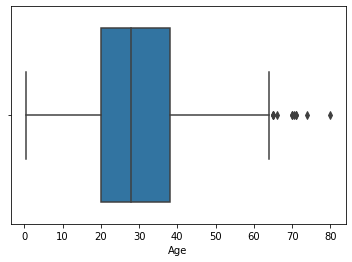

In [ ]:
##lets check outliers
sns.boxplot('Age',data=df4)

In [ ]:
##lets store the value as extreme
extreme=df4['Age'].mean()+3*df4['Age'].std()

In [ ]:
##lets write a function 
def imputet_enan(df,variable,median,extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
##lets execute
imputet_enan(df4,'Age',df4.Age.median(),extreme)

In [ ]:
df4.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


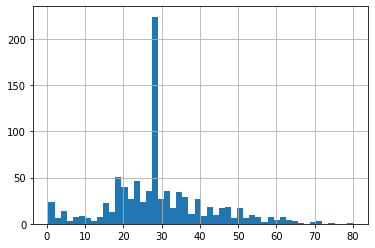

In [ ]:
df4['Age'].hist(bins=50)
## we can observe that due to median one huge bar ,similarly we can observe with kde


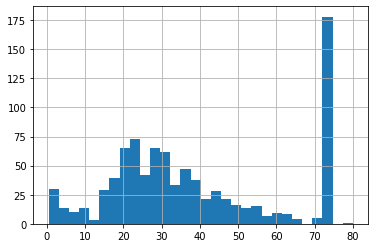

In [ ]:
df4['Age_end_distribution'].hist(bins=30)
##we can see huge distribution at the end but there is a difference , that we can see with boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


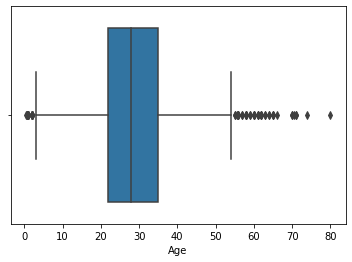

In [ ]:
##consider the box plot of Age with median impute
sns.boxplot('Age',data=df4)
##we can notice huge amount of outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


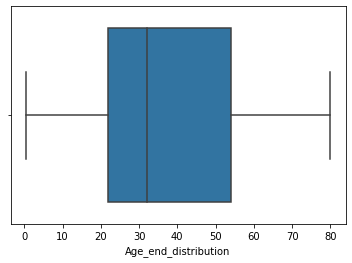

In [ ]:
##But if we observe the boxplot of Age end of distribution
sns.boxplot('Age_end_distribution',data=df4)
##now we find no outliers , this gives the proper distribution of age 

##Advantages
###1) Easy to implement 
###2) Captures the importance of missingness if there is one

##Disadvantage 
###1) distorts the orginal distribution of the vairable
###2) if missingess is not important,it may mask the predective power of the original variable bt distorting its distribution 
###3) If the number of NA is big, it will mask true outliers in the distribution
###4) if the number of NA is small , the replaced NA may be considered an outlier and pre processed in a subsequent feature Engineering 

#**5th Technique - Arbitary value Imputation**

### It consists of replacing NaN by an Arbitary value
####this technique was dreived from Kaggle competition

##Advantages
####1) Easy to implement 
####2) Captures the importance of missingness if there is one 

##Disadvantages
####1) Distorts the original distribution of the variable
####2) if missingness is not important, it may mask the predective power of the original variable by distorting its distribution
####3) Hard to decide which value to use 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
dat=pd.read_csv("/content/drive/MyDrive/datasets/Titanic/train (1).csv",usecols=['Age','Fare','Survived'])
dat.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_arb(dat,variable):
  dat[variable+'__replacebyhundred']=dat[variable].fillna(100)
## we are taking the arbitary value as 100 because in our above histograms , we can see we have values ranging from 0-80
## we can take either first non frequent value like 0
##or we can take right extreme non frequent value like 80
## it should not be more frequently present